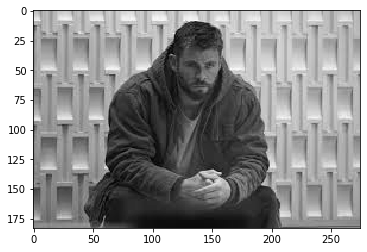

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images2.jfif',0)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
import tensorflow as tf

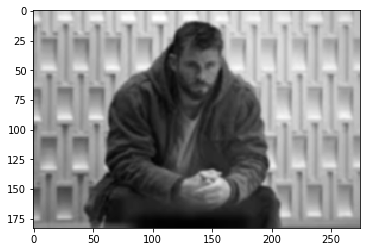

In [4]:
# Gaussian Blurring
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur, cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
# Apply Sobelx in high output datatype 'float32'
# and then converting back to 8-bit to prevent overflow
sobelx_64 = cv2.Sobel(blur,cv2.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)
 
# Similarly for Sobely
sobely_64 = cv2.Sobel(blur,cv2.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)
 

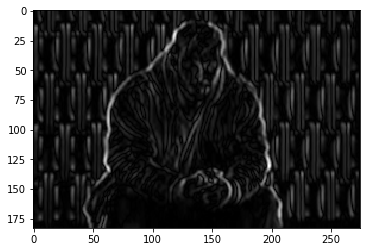

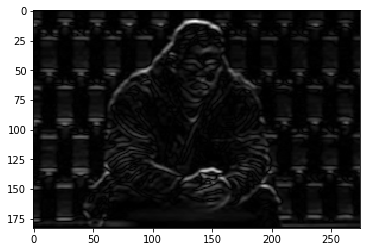

In [6]:
plt.imshow(sobelx_8u, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(sobely_8u, cmap = plt.get_cmap('gray'))
plt.show()

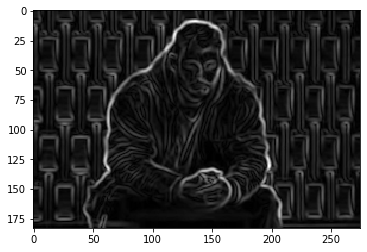

In [7]:
# From gradients calculate the magnitude and changing it to 8-bit
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)
plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()


In [9]:
# Find the direction and change it to degree
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

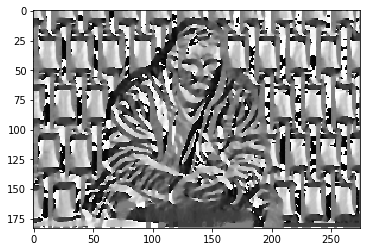

In [10]:
plt.imshow(angle, cmap = plt.get_cmap('gray'))
plt.show()

In [11]:
# Find the neighbouring pixels (b,c) in the rounded gradient direction
# and then apply non-max suppression
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            
        # Non-max Suppression
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

In [35]:
#hysteresis thresholding
# Set high and low threshold

highThreshold = 105
lowThreshold = 85

M, N = Non_max.shape
out = np.zeros((M,N), dtype= np.uint8)

# If edge intensity is greater than 'High' it is a sure-edge
# below 'low' threshold, it is a sure non-edge
strong_i, strong_j = np.where(Non_max >= highThreshold)
zeros_i, zeros_j = np.where(Non_max < lowThreshold)

# weak edges
weak_i, weak_j = np.where((Non_max <= highThreshold) & (Non_max >= lowThreshold))

# Set same intensity value for all edge pixels
out[strong_i, strong_j] = 255
out[zeros_i, zeros_j ] = 0
out[weak_i, weak_j] = 75

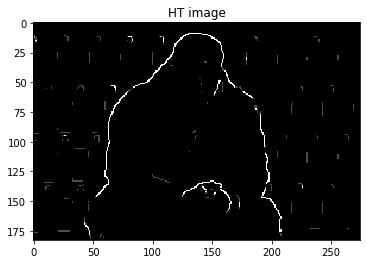

In [36]:
plt.imshow(out, cmap = plt.get_cmap('gray'))
plt.title('HT image')
plt.show()